# PHYS20762 - Random Sampling

(c) Hywel Owen  
University of Manchester  
1st March 2020

## Generating Random Numbers

### The Python Numpy Built-In Random Number Generator

In [1]:
# Uncomment the line below to be able to spin all the plots.
# %matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams.update({'font.size': 14})
plt.style.use('default')

## So Why Isn't $\chi^2=1$ All The Time Anyway?

In this notebook we will explore the properties of random numbers, and in particular the random numbers produced by computers.  
  
You probably already know that there is a 'random number generator' available in most computer programming languages. We already imported the Python3 **random** library, so let's go ahead and generate some numbers:  

In [2]:
np.random.random()

0.3114650900704229

If you try running the cell above several times, you will see that the *default* method of using the **random()** command is to produce numbers that lie between 0 and 1. Really, we should make a set of these so we can look at them.  
Let's make 1000 numbers and put them in an array:

In [3]:
random_set=np.array([])
# This is a pretty terrible way to generate 1000 random numbers, but it explicitly shows that we can
# generate 1 random number at a time and put 1000 of them into an array
for i in range(1000):
    random_set = np.append(random_set, np.random.random())
print(random_set)

[3.94930272e-01 4.38306816e-01 1.68181792e-01 4.51229798e-01
 8.28902414e-01 9.65297553e-01 8.54274689e-01 5.21131877e-01
 3.93314361e-01 1.02543823e-02 3.62697735e-01 8.91393012e-01
 6.96478414e-01 8.08274081e-01 7.56503408e-01 4.03317287e-01
 2.70868835e-01 7.60959508e-01 4.43441598e-01 6.83237205e-01
 2.05943260e-01 9.10193133e-01 8.05142176e-01 8.73178299e-01
 6.89232776e-01 8.14453212e-01 6.81544520e-01 9.05307015e-02
 7.60082382e-01 1.79812409e-02 8.28256359e-01 9.89154396e-01
 4.17155973e-01 7.81943117e-01 4.15243774e-01 3.85680621e-01
 1.19090330e-01 4.83389467e-01 8.88501147e-01 3.11248591e-01
 9.67678496e-01 9.90781268e-01 7.01714279e-01 6.03176497e-01
 7.31583827e-01 2.69407493e-01 9.81598978e-01 8.70844355e-01
 4.89780553e-01 9.44771498e-01 9.49063904e-03 9.11523647e-01
 6.29590285e-01 7.21187272e-02 5.54274970e-01 7.36431736e-01
 4.23137645e-01 5.98334017e-01 5.43498120e-02 2.32365785e-01
 9.06209194e-02 9.78742408e-01 5.39743489e-01 8.75843766e-01
 8.97749962e-01 2.145215

Obviously, printing the numbers isn't that useful. Let's histogram them:

(array([ 92., 104.,  87.,  93., 113.,  99.,  99.,  96., 113., 104.]),
 array([5.96990174e-04, 1.00524812e-01, 2.00452633e-01, 3.00380455e-01,
        4.00308276e-01, 5.00236098e-01, 6.00163919e-01, 7.00091741e-01,
        8.00019562e-01, 8.99947384e-01, 9.99875205e-01]),
 <a list of 10 Patch objects>)

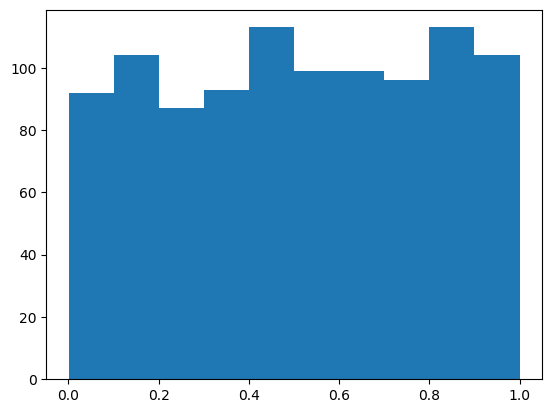

In [4]:
plt.hist(random_set, bins = 10)

We now see something interesting. The random number generator is producing *samples* between 0 and 1, but with *equal probability* of the generated number being anywhere between 0 and 1. Obviously, you can see that the histogram isn't *exactly* flat, and there is some *fluctuation* around the average value. For 1000 random numbers, and 10 bins (bin size is 0.1), the *expectation value* of the number of samples in each bin is 100.  
  
This is a *uniform random number generator*, since the values $u$ is produces are *uniformly-distributed* (equal probability).

Actually, we can generate the numbers all in one go by doing:

(array([119.,  97.,  86., 100., 114.,  94., 101.,  91., 108.,  90.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

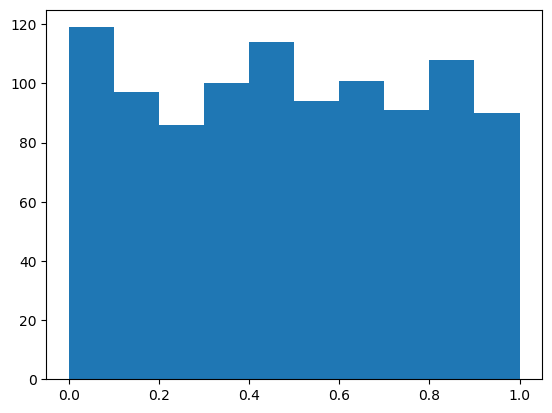

In [5]:
random_set = np.random.random(1000)
plt.hist(random_set, bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])

We can create a larger set of numbers (10,000 here):

(array([1005.,  965., 1044.,  968.,  978., 1052., 1062.,  957.,  966.,
        1003.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

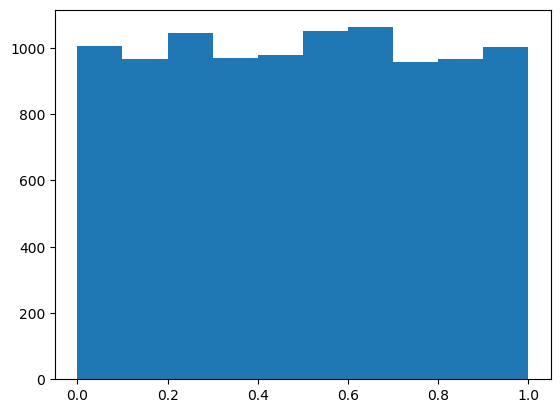

In [6]:
random_set = np.random.random(10000)
plt.hist(random_set, bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])

We see that the fluctuations are apparently smaller. We should calculate the variance of the number of samples around the expectation value.

Writing the number of samples as $n$, with 10 bins we have a probability $p=0.1$ of a given random sample lying in (say) bin number 1 between 0 and 0.1. Therefore the expectation value is $a = n p $.  
  
This is a binomial situation, so therefore  
$Var(a) = n p (1-p) = a(1-\frac{a}{n})$.  
  
The standard deviation is then just  
$\sigma_a = \sqrt{Var(a)} = \sqrt{n p (1-p)} = \sqrt{a(1-\frac{a}{n})}$.
  
$n = 1000$ gives $\sigma_a =\sqrt{90} \simeq 9.5$.  

Notice that as the number of bins increases, $p$ gets smaller, and we can use Poisson statistics, i.e.  
$\sigma_a \simeq \sqrt{a}$,  
and for large $a$ the fluctuation is approximately normallly-distributed (Gaussian-shaped). $p=0.1$ is already pretty close: for $n = 1000$ we have $\sigma_a \simeq \sqrt{100} = 10$. The difference between 10 and 9.5 is pretty small!  
  
In summary: we expect the fluctuation in each bin to be $\sigma_a \simeq \sqrt{a}$. For example:
- $n=1000$, $a=10$, $\sigma_a \simeq 10$. The *relative* fluctuation is $\sigma_a/a \simeq 0.1$ (10%).
- $n=10000$, $a=100$, $\sigma_a \simeq 30$. The *relative* fluctuation is $\sigma_a/a \simeq 0.03$ (3%).  
  
Let's check that's true by extracting the bin counts in our larger (10,000 sample) set:

In [7]:
random_set = np.random.random(10000)
bin_frequencies, bin_locations = np.histogram(random_set, bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
np.std(bin_frequencies)

28.948229652260256

We see that the fluctuation is indeed about +/-30 as expected.

### What is a Random Number Generator? Pseudorandom Sequences

But how are random numbers generated in Python (or indeed in any programming language)? The big step you must take is to realise that the random numbers we generated above are **not really random**. They are in fact numbers in a sequence, and each number is **uniquely** determined by the previous number. Hence these are **deterministic**, **pseudo-random** numbers.  
  
There are many sequences - defined by some formula - that give numbers that are *apparently* random. We will see later that all that is required is that the numbers are *sufficiently* random with respect to the situation where they are being used.  
  
The most widespread random number general is the **linear congruential generator** (LCG), invented by Derrick Lehmer. This uses a simple modulo arithmetic to generate numbers. We need only 3 numbers to define what kind of LCG we have:
- Multiplier $a$;
- Offset $c$; 
- Modulus $m$.
We also need a *seed* value $x_0$ which defines the first number in the sequence. Each successive number is defined simply as:  
$x_n = a x_{n-1} + c$ mod $m$.  
We see that the numbers which are generated lie between 0 and $m-1$. Hence numbers *returned* by the generator are  
$u_n = x_n / m$.
An appropriate choice of $a$, $c$ and $m$ gives every possible value of $m$ only once before repeating.  
  
Let's write an LCG. This is probably a good time to write a Python **class**:

In [8]:
class LCG:
    """
    A general linear congruential generator
    """
    def __init__(self, m, a, c):
        self.m = m
        self.a = a
        self.c = c
        self.seed = 0
        self.this_sample = self.seed # Set initial sequence value to be the seed
        # Can return the original seed value if we want to!
        
    def sample(self):
        # Generate the sample (between 0 and m)
        self.this_sample = (self.a * self.this_sample + self.c) % self.m
        # Return the sample (between 0 and 1)
        return self.this_sample/self.m
    
    # Allow the seed value to be set explicitly
    def set_seed(self, seed_val):
        self.seed = seed_val
        self.this_sample = self.seed

# We create an instance of the general LCG class, which generates (individual) samples using
# the a,m,c values used in the classic computing text 'Numerical Recipes'
numericalrecipes = LCG(2**32,1664525, 1013904223)

In [9]:
numericalrecipes.sample()

0.23606797284446657

We can see that these samples look much the same as the built-in generator:

23.15167380558045

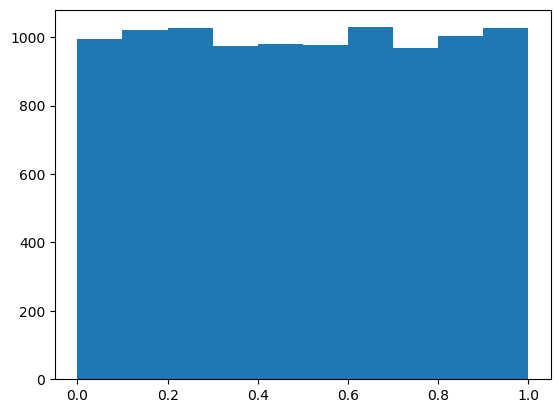

In [10]:
random_set_lcg=np.array([])
for i in range(10000):
    random_set_lcg = np.append(random_set_lcg, numericalrecipes.sample())
plt.hist(random_set_lcg, bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
bin_frequencies, bin_locations = np.histogram(random_set_lcg, bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
np.std(bin_frequencies)

A nice thing about using our own LCG is that we can see exactly how it works. For example, if we set the seed explicitly each time, we can generate the same sequence over and over again:

(array([110.,  90.,  96., 128.,  91., 109.,  98., 104.,  97.,  77.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

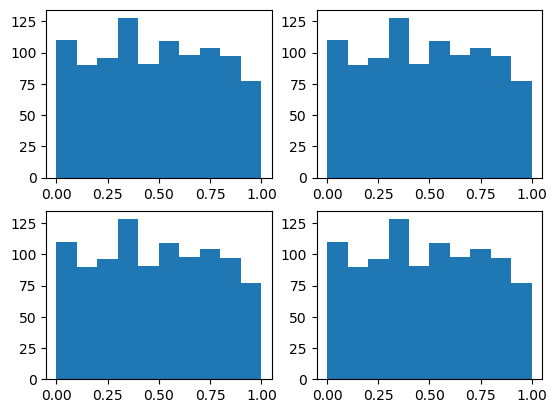

In [11]:
numericalrecipes = LCG(2**32,1664525, 1013904223)
# Create 4 identical data sets by setting the random seed each time
# Data set 1
random_set_lcg=np.array([])
numericalrecipes.set_seed(14325)
for i in range(1000):
    random_set_lcg = np.append(random_set_lcg, numericalrecipes.sample())
plt.subplot(221)
plt.hist(random_set_lcg, bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
# Data set 2
random_set_lcg=np.array([])
numericalrecipes.set_seed(14325)
for i in range(1000):
    random_set_lcg = np.append(random_set_lcg, numericalrecipes.sample())
plt.subplot(222)
plt.hist(random_set_lcg, bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
# Data set 3
random_set_lcg=np.array([])
numericalrecipes.set_seed(14325)
for i in range(1000):
    random_set_lcg = np.append(random_set_lcg, numericalrecipes.sample())
plt.subplot(223)
plt.hist(random_set_lcg, bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
# Data set 4
random_set_lcg=np.array([])
numericalrecipes.set_seed(14325)
for i in range(1000):
    random_set_lcg = np.append(random_set_lcg, numericalrecipes.sample())
plt.subplot(224)
plt.hist(random_set_lcg, bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])

We can also test out other combinations of random number generators. Let's compare some sets of (x,y,z) points

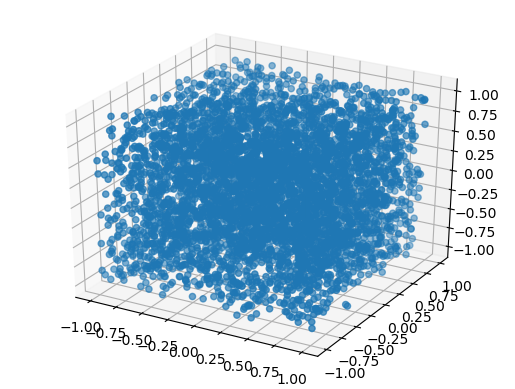

In [12]:
# Create instances of the LCG class, but for different values of m,a and c
numericalrecipes = LCG(2**32,1664525, 1013904223)
glibc = LCG(2**32,1103515245, 12345)
msvisualbasic = LCG(2**24,1140671485, 12820163) # Note here the much-reduced modulus m
randu = LCG(2**31,65539, 0) # RANDU is a notoriously-bad LCG that should not be used!

nsamples = 5000

# Make samples using built-in Numpy random number generator
x_np = np.zeros(nsamples)
y_np = np.zeros(nsamples)
z_np = np.zeros(nsamples)
for i in range(nsamples):
    x_np[i] = 2*np.random.random()-1
    y_np[i] = 2*np.random.random()-1
    z_np[i] = 2*np.random.random()-1
    
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')
ax1.scatter(x_np,y_np,z_np)

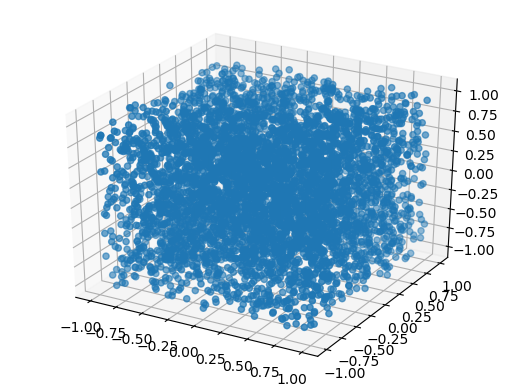

In [13]:
# Make samples using Numerical Recipes algorithm
nsamples = 5000
x_np = np.zeros(nsamples)
y_np = np.zeros(nsamples)
z_np = np.zeros(nsamples)
for i in range(nsamples):
    x_np[i] = 2*numericalrecipes.sample()-1
    y_np[i] = 2*numericalrecipes.sample()-1
    z_np[i] = 2*numericalrecipes.sample()-1
    
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')
ax1.scatter(x_np,y_np,z_np)
# This one looks fine

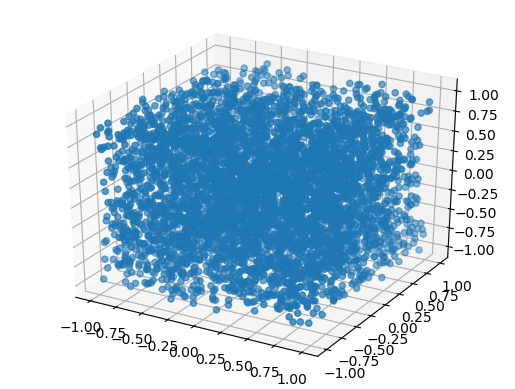

In [14]:
# Make samples using RANDU algorithm
nsamples = 5000
x_np = np.zeros(nsamples)
y_np = np.zeros(nsamples)
z_np = np.zeros(nsamples)
# RANDU is so bad that you have to set a non-zero seed to make it work at all!
randu.set_seed(28538)
for i in range(nsamples):
    x_np[i] = 2*randu.sample()-1
    y_np[i] = 2*randu.sample()-1
    z_np[i] = 2*randu.sample()-1
    
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')
ax1.scatter(x_np,y_np,z_np)
# Try spinning the cube around (uncomment the %matplotlib notebook above) - you will see stripes!

The conclusion is that you can use **pseudorandom** generators (like LCGs), but you have to be *careful* to ensure that there are no peculiar correlations between the points.

## Gaussian Random Variates from the Central Limit Theorem

A nice application of the central limit theorem is to use a uniform random number generator to generate numers drawn from a non-uniform distribution. The first we shall show is how to draw samples from a Gaussian (normal) distribution.

Mean value = -0.02
Std. dev.  = 0.97


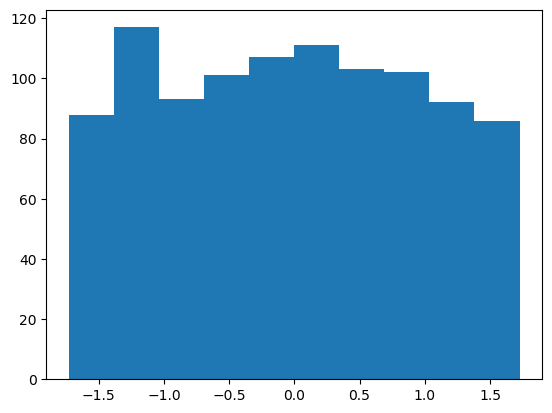

In [15]:
def gaussianVariateCLT(n):
    """
    Generates a sample by combining n uniform random variates
    """
    
    # Sum n uniform variates, and scale to make zero mean and unit standard deviation
    g_val = (np.sum(np.random.random(n))-n/2)/np.sqrt(n/12)
    
    return g_val

# First, we check that when n = 1 we get an ordinary uniform distribution, just shifted
num_samples = 1000
random_set=np.array([])
for i in range(num_samples):
    random_set = np.append(random_set, gaussianVariateCLT(1))
plt.hist(random_set)
print('Mean value = {:04.2f}'.format(np.mean(random_set)))
print('Std. dev.  = {:04.2f}'.format(np.std(random_set)))

Mean value = 0.01
Std. dev.  = 1.00


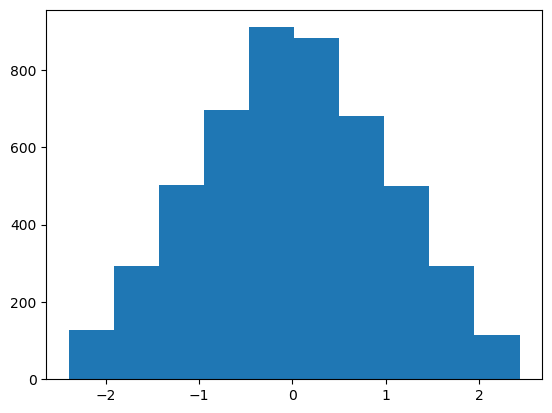

In [16]:
# Next, we see that when n = 2 we have a triangle!
num_samples = 5000
random_set=np.array([])
for i in range(num_samples):
    random_set = np.append(random_set, gaussianVariateCLT(2))
plt.hist(random_set)
print('Mean value = {:04.2f}'.format(np.mean(random_set)))
print('Std. dev.  = {:04.2f}'.format(np.std(random_set)))

Mean value = 0.02
Std. dev.  = 1.00


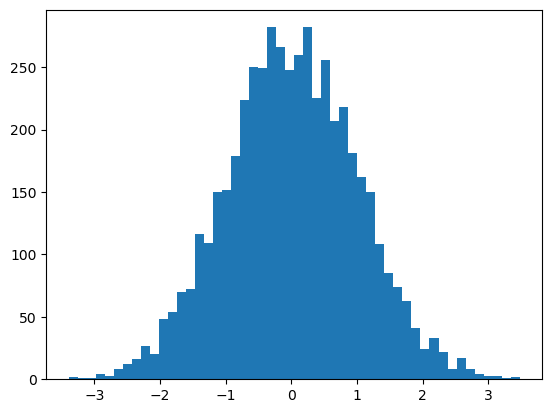

In [17]:
# When n = 12 we have a pretty good Gaussian
num_samples = 5000
random_set=np.array([])
for i in range(num_samples):
    random_set = np.append(random_set, gaussianVariateCLT(12))
plt.hist(random_set, bins = 50)
print('Mean value = {:04.2f}'.format(np.mean(random_set)))
print('Std. dev.  = {:04.2f}'.format(np.std(random_set)))

It is quite common to see a Gaussian variate being generated using 12 uniform variates, since the function definition simplifies to this:

Mean value = -0.03
Std. dev.  = 1.01


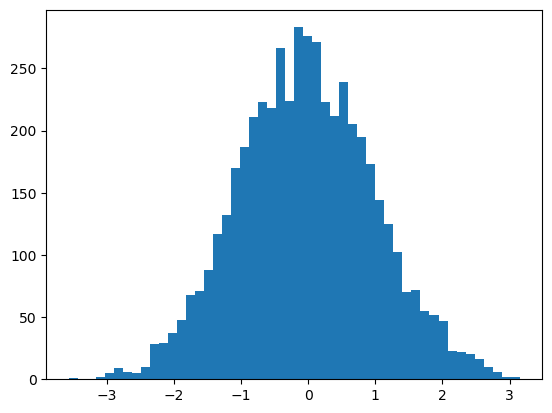

In [18]:
def gaussianVariateCLT12():
    """
    Generates a sample by combining 12 uniform random variates
    """
    return np.sum(np.random.random(12))-6

num_samples = 5000
random_set=np.array([])
for i in range(num_samples):
    random_set = np.append(random_set, gaussianVariateCLT(12))
plt.hist(random_set, bins = 50)
print('Mean value = {:04.2f}'.format(np.mean(random_set)))
print('Std. dev.  = {:04.2f}'.format(np.std(random_set)))

As an extreme example of being able to generate Gaussian variates using the central limit theorem, let's make a random number generator that uses only zeros and ones. First, we demonstrate the output from **np.random.choice**, which we will use here:

In [19]:
np.random.choice([0,1],10)

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 1])

To make our Gaussian variate, we again just add up the individual samples and scale appropriately:

Mean value = -0.00
Std. dev.  = 0.52


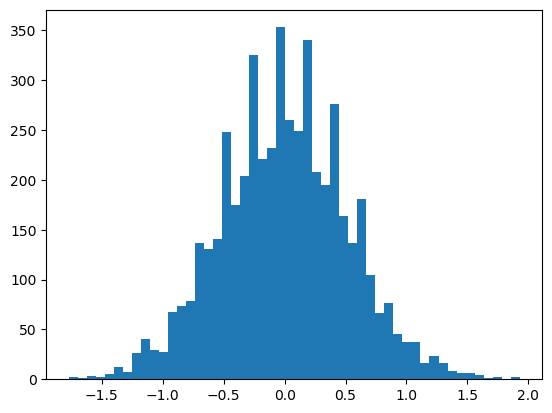

In [20]:
def gaussianVariateCLTChoice():
    """
    Generates a sample by combining 1000 values of either 0 or 1
    """
    return (np.sum(np.random.choice([0,1],1000))-500)/np.sqrt(1000)

num_samples = 5000
random_set=np.array([])
for i in range(num_samples):
    random_set = np.append(random_set, gaussianVariateCLTChoice())
plt.hist(random_set, bins = 50)
print('Mean value = {:04.2f}'.format(np.mean(random_set)))
print('Std. dev.  = {:04.2f}'.format(np.std(random_set)))

Just to show that you can generare Gaussian variates from anything, let's use the UK National Lottery results from 25th April 2015 as our source of numbers:

Mean value = 0.03
Std. dev.  = 1.00


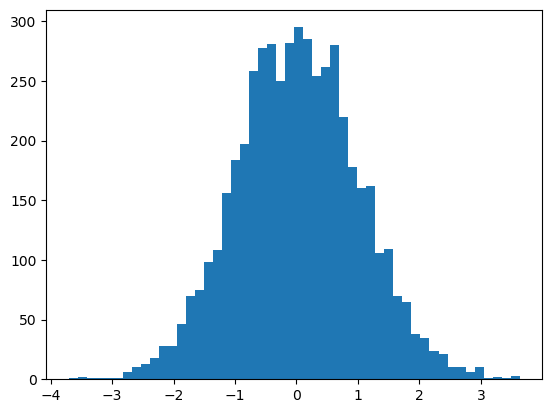

In [21]:
national_lottery_numbers = np.array([5, 11, 13, 20, 33])
lottery_numbers_mean = np.mean(national_lottery_numbers)
lottery_numbers_std = np.std(national_lottery_numbers)
def gaussianVariateCLTLottery():
    """
    Generates a sample by combining 100 random choices from the Lottery numbers
    """
    # We scale the mean and standard deviation using 100 and sqrt(100)
    return (np.sum(np.random.choice(national_lottery_numbers,100))/100-lottery_numbers_mean)/(lottery_numbers_std/10)

num_samples = 5000
random_set=np.array([])
for i in range(num_samples):
    random_set = np.append(random_set, gaussianVariateCLTLottery())
plt.hist(random_set, bins = 50)
print('Mean value = {:04.2f}'.format(np.mean(random_set)))
print('Std. dev.  = {:04.2f}'.format(np.std(random_set)))